<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/Fully_Connected_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras is a powerful and easy-to-use Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano, CNTK and TensorFlow and allows you to define and train neural network models in a few short lines of code. In this tutorial you will discover how to create your first neural network model in Python using Keras. After completing this lesson you will know:


*   How to load a dataset for use with Keras.
*   How to define and compile a Multilayer Perceptron model in Keras.
*   How to evaluate a Keras model on a validation dataset.



# Load Libraries

First step is to load the required libraries.

In [ ]:
import numpy 

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

# Load Dataset in Numpy Format

MNIST is a simple computer vision dataset. It consists of images of handwritten digits. It also includes labels for each image, telling us which digit it is.

The MNIST data is split into two parts: $60,000$ data points of training data, and $10,000$ points of test data. Each image is 28 pixels by 28 pixels.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

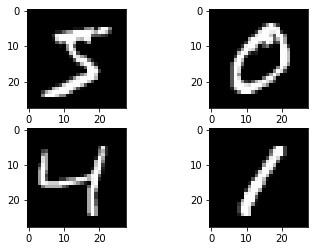

In [ ]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Formatting Data and Labels for Keras

We can flatten this array into a vector of $28\times28 = 784$ numbers. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space. The data should always be of the format (Number of data points, data point dimension). In this case the training data will be of format $60,000\times784$.
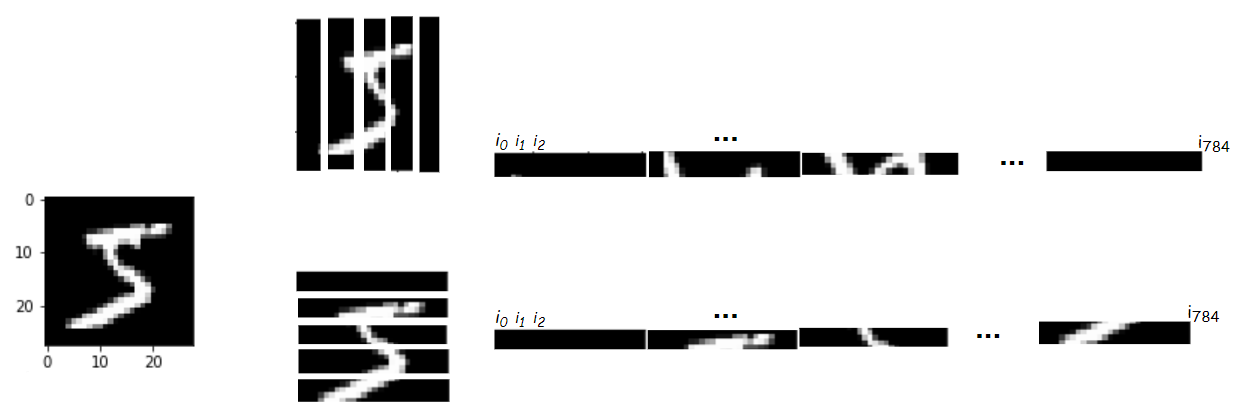



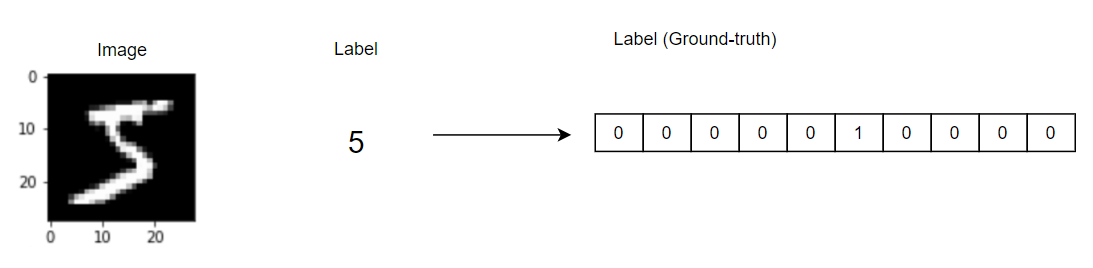

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')

X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

X_train = X_train / 255 

X_test = X_test / 255

y_train = to_categorical(y_train) 

y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000, 10)

# Defining a single layer neural network model

Here we will define a single layer neural network. It will have a input layer of $784$ neurons, i.e. the input dimension and output layer of $10$ neurons, i.e. number of classes. The activation function used will be softmax activation.

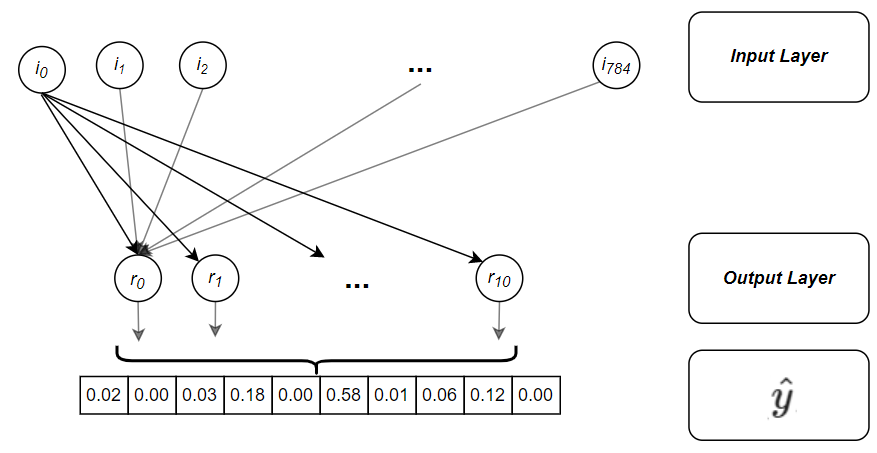

In [ ]:
# create model

model = Sequential()   # 784 10

model.add(Dense(num_classes, input_dim=num_pixels, activation='softmax'))


# Compiling the model

Once the model is defined, we have to compile it. While compiling we provide the loss function to be used, the optimizer and any metric. Here we will use crossentropy loss ($\sum_{i=1}^C y_i. log (\hat y_i)$) with Adam optimizer and accuracy as a metric.

In [ ]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


# Training/Fitting the model

Now the model is ready to be trained. We will provide training data to the network. Also we will specify the validation data, over which the model will only be validated.

In [ ]:
# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 3s 3ms/step - loss: 1.4641 - accuracy: 0.6593 - val_loss: 0.9840 - val_accuracy: 0.8087
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.8588 - accuracy: 0.8203 - val_loss: 0.7245 - val_accuracy: 0.8425
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.6915 - accuracy: 0.8431 - val_loss: 0.6163 - val_accuracy: 0.8592
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.6097 - accuracy: 0.8543 - val_loss: 0.5554 - val_accuracy: 0.8687
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5597 - accuracy: 0.8624 - val_loss: 0.5155 - val_accuracy: 0.8741
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5254 - accuracy: 0.8676 - val_loss: 0.4874 - val_accuracy: 0.8785
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5000 - accuracy: 0.8720 - val_loss: 0.4657 - val_accuracy: 0.8815
Epoch 

# Evaluating the model

Finally we will evaluate the model on the testing dataset.

In [ ]:
# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.4234 - accuracy: 0.8884
Baseline Error: 11.16%


# Defining a multi-layer model

Now we will define a multi layer neural network in which we will add $2$ hidden layers having $500$ and $100$ neurons.

In [ ]:
model = Sequential()

model.add(Dense(500, input_dim=num_pixels, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(num_classes, activation='softmax')) 


In [ ]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model

print('\n Testing the model \n')

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2854 - accuracy: 0.9179 - val_loss: 0.1363 - val_accuracy: 0.9611
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1039 - accuracy: 0.9687 - val_loss: 0.0945 - val_accuracy: 0.9712
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0655 - accuracy: 0.9801 - val_loss: 0.0767 - val_accuracy: 0.9759
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0457 - accuracy: 0.9863 - val_loss: 0.0776 - val_accuracy: 0.9775
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.0645 - val_accuracy: 0.9792
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0663 - val_accuracy: 0.9803
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0658 - val_accuracy: 0.9789
Epoch 

# Defining a deep model

Now we will define a deeper neural network in which we will add $3$ hidden layers having $500$, $100$, and $50$ neurons.

In [ ]:
model = Sequential()  

model.add(Dense(500, input_dim=num_pixels, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(50, activation = 'relu'))  # relu tanh   prelu  lrelu

model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model

print('\n Testing the model \n')

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.2847 - accuracy: 0.9191 - val_loss: 0.1343 - val_accuracy: 0.9582
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0999 - accuracy: 0.9696 - val_loss: 0.0830 - val_accuracy: 0.9736
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0662 - accuracy: 0.9798 - val_loss: 0.0737 - val_accuracy: 0.9762
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0741 - val_accuracy: 0.9767
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0795 - val_accuracy: 0.9746
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.0692 - val_accuracy: 0.9791
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0772 - val_accuracy: 0.9786
Epoch 

# Analyzing Model Summary

The following function provides us with detailed summary of the model. We can use it after we have defined
our model.

In [ ]:
model.summary()  # 784*500+500

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 500)               392500    
                                                                 
 dense_39 (Dense)            (None, 100)               50100     
                                                                 
 dense_40 (Dense)            (None, 50)                5050      
                                                                 
 dense_41 (Dense)            (None, 10)                510       
                                                                 
Total params: 448,160
Trainable params: 448,160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import h5py

# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

model.save_weights('FC.h5')

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0755 - val_accuracy: 0.9799
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0133 - accuracy: 0.9953 - val_loss: 0.0846 - val_accuracy: 0.9793
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.0877 - val_accuracy: 0.9794
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.0779 - val_accuracy: 0.9810
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.0880 - val_accuracy: 0.9794
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0879 - val_accuracy: 0.9804
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.0945 - val_accuracy: 0.9801
Epoch 

# Loading the saved model

In [ ]:
model.load_weights('FC.h5')

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0826 - accuracy: 0.9822
Baseline Error: 1.78%


# Creating checkpoints of model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath='FC1.h5'
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max')
filepath='FC2.h5'
checkpoint2 = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')
callbacks_list = [checkpoint1,checkpoint2]
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, callbacks=callbacks_list)

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0859 - val_accuracy: 0.9807
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.0863 - val_accuracy: 0.9833
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: 0.0877 - val_accuracy: 0.9825
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.1107 - val_accuracy: 0.9778
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0091 - accuracy: 0.9968 - val_loss: 0.0912 - val_accuracy: 0.9804
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0949 - val_accuracy: 0.9828
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0948 - val_accuracy: 0.9825
Epoch 

# Defining Learning Rate Decay and Other Parameters of Optimizer

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam

sgd = SGD(lr = 0.0001)   # 0.001  to 0.000001

adam = Adam(lr=0.001)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])



# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0995 - val_accuracy: 0.9835
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0994 - val_accuracy: 0.9835
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0994 - val_accuracy: 0.9836
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0994 - val_accuracy: 0.9836
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0993 - val_accuracy: 0.9836
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0993 - val_accuracy: 0.9836
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0993 - val_accuracy: 0.9836
Epoch 

# Defining Regularizers for the model

Here we will add dropout and weight regularizations in the model.

The loss function with $\mathcal{l}_1$ weigth regularizer is:


$\mathcal{L} = CE + \lambda\sum_{i=1}^n |W_i|$

The loss function with $\mathcal{l}_2$ weigth regularizer is:


$\mathcal{L} = CE + \lambda\sum_{i=1}^n {W_i}^2$

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

model = Sequential() 

model.add(Dense(500, input_dim=num_pixels, activation='relu', kernel_regularizer=regularizers.l1(1e-3)))

model.add(Dropout(0.3))

model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(1e-5)))

model.add(Dropout(0.25))

model.add(Dense(50, activation = 'sigmoid', kernel_regularizer=regularizers.l1(1e-4)))

model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(1e-4)))

In [ ]:
# Compile model
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model

print('\n')

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 2.5872 - accuracy: 0.7193 - val_loss: 0.8646 - val_accuracy: 0.9021
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.9558 - accuracy: 0.8694 - val_loss: 0.7516 - val_accuracy: 0.9257
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.8381 - accuracy: 0.8984 - val_loss: 0.6832 - val_accuracy: 0.9391
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.7715 - accuracy: 0.9123 - val_loss: 0.6259 - val_accuracy: 0.9497
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.7395 - accuracy: 0.9168 - val_loss: 0.5871 - val_accuracy: 0.9554
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.7074 - accuracy: 0.9215 - val_loss: 0.5557 - val_accuracy: 0.9578
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6878 - accuracy: 0.9258 - val_loss: 0.5593 - val_accuracy: 0.9623
Epoch 

# Defining Initialization for the model

Here we will add glorot normal initialization in the model

In [ ]:
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dropout

model = Sequential()


model.add(Dense(500, input_dim=num_pixels, activation='sigmoid', kernel_initializer=initializers.GlorotNormal()))

model.add(Dense(100, activation='sigmoid', kernel_initializer=initializers.GlorotNormal()))

model.add(Dense(50, activation = 'sigmoid', kernel_initializer=initializers.GlorotNormal()))

model.add(Dense(num_classes, activation='softmax', kernel_initializer=initializers.GlorotNormal()))

In [ ]:
# Compile model
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
print('\n')

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.9914 - accuracy: 0.7525 - val_loss: 0.3573 - val_accuracy: 0.9163
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2798 - accuracy: 0.9269 - val_loss: 0.2174 - val_accuracy: 0.9411
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1883 - accuracy: 0.9482 - val_loss: 0.1651 - val_accuracy: 0.9511
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1421 - accuracy: 0.9602 - val_loss: 0.1369 - val_accuracy: 0.9598
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1115 - accuracy: 0.9691 - val_loss: 0.1161 - val_accuracy: 0.9666
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0900 - accuracy: 0.9749 - val_loss: 0.0975 - val_accuracy: 0.9706
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0733 - accuracy: 0.9795 - val_loss: 0.0876 - val_accuracy: 0.9729
Epoch 